In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("data_cleaned.csv")

display(df)

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_category
0,19,1,27.900,0,1,southwest,16884.92400,Surpoids,18-25
1,18,0,33.770,1,0,southeast,1725.55230,Obésité modérée,18-25
2,28,0,33.000,3,0,southeast,4449.46200,Obésité modérée,26-30
3,33,0,22.705,0,0,northwest,21984.47061,Poids normal,31-40
4,32,0,28.880,0,0,northwest,3866.85520,Surpoids,31-40
...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,0,northwest,10600.54830,Obésité modérée,41-50
1333,18,1,31.920,0,0,northeast,2205.98080,Obésité modérée,18-25
1334,18,1,36.850,0,0,southeast,1629.83350,Obésité sévère,18-25
1335,21,1,25.800,0,0,southwest,2007.94500,Surpoids,18-25


___
### Statistiques descriptives
___

### Analyse univariée

Dans cette partie, on étudie quelques variables intéressantes de notre dataframe pour en extraire les caractéristiques importantes. Cette étape permet d'avoir un premier aperçu de nos données avant de les croiser.

In [32]:
df.describe().round(2)

,age,sex,bmi,children,smoker,charges
count,1337.00,1337.0,1337.00,1337.00,1337.0,1337.00
mean,39.22,0.5,30.66,1.10,0.2,13279.12
std,14.04,0.5,6.10,1.21,0.4,12110.36
min,18.00,0.0,15.96,0.00,0.0,1121.87
25%,27.00,0.0,26.29,0.00,0.0,4746.34
50%,39.00,0.0,30.40,1.00,0.0,9386.16
75%,51.00,1.0,34.70,2.00,0.0,16657.72
max,64.00,1.0,53.13,5.00,1.0,63770.43


#### Pour les variables catégorielles, on calcule les effectifs et les pourcentages.

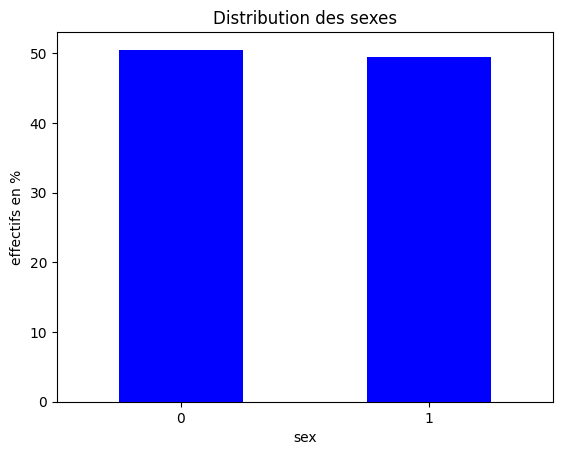

In [33]:
#calcule les effectifs et les %
df['sex'].value_counts() 
distri_sex = df['sex'].value_counts(normalize=True).round(4).mul(100)

distri_sex.plot(kind='bar', rot=0, color='blue')
plt.title("Distribution des sexes")
plt.ylabel('effectifs en %')
plt.show()


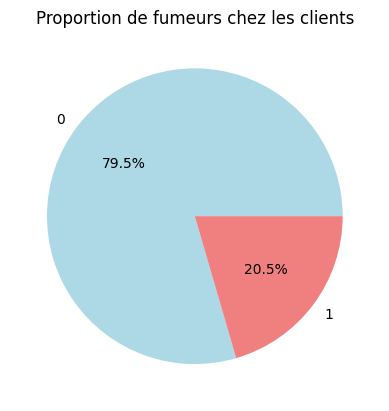

In [34]:
df['smoker'].value_counts()
distri_smoker = df['smoker'].value_counts(normalize=True).round(4).mul(100)


distri_smoker.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','lightcoral'])
plt.title('Proportion de fumeurs chez les clients')
plt.ylabel('')
plt.show()

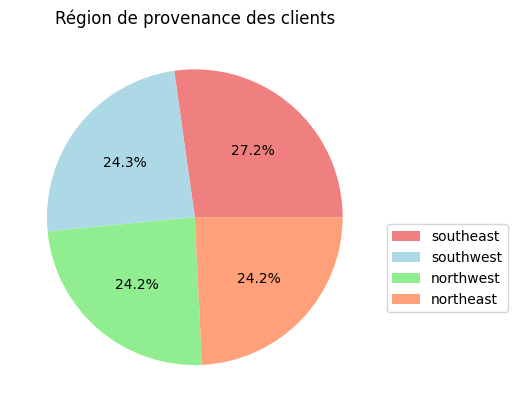

In [35]:
df['region'].value_counts()
distri_region = df['region'].value_counts(normalize=True).round(4).mul(100)

distri_region.plot(kind='pie', autopct='%1.1f%%', labels= None, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon'])
plt.title('Région de provenance des clients')
plt.ylabel('')

plt.legend(labels=distri_region.index, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Pour les variables numériques, on peut analyser la distribution des données avec des outils comme l'histogramme ou la boîte à moustache.  Le boxplot est particulièrement utile car il aide à visualiser la symétrie des données.

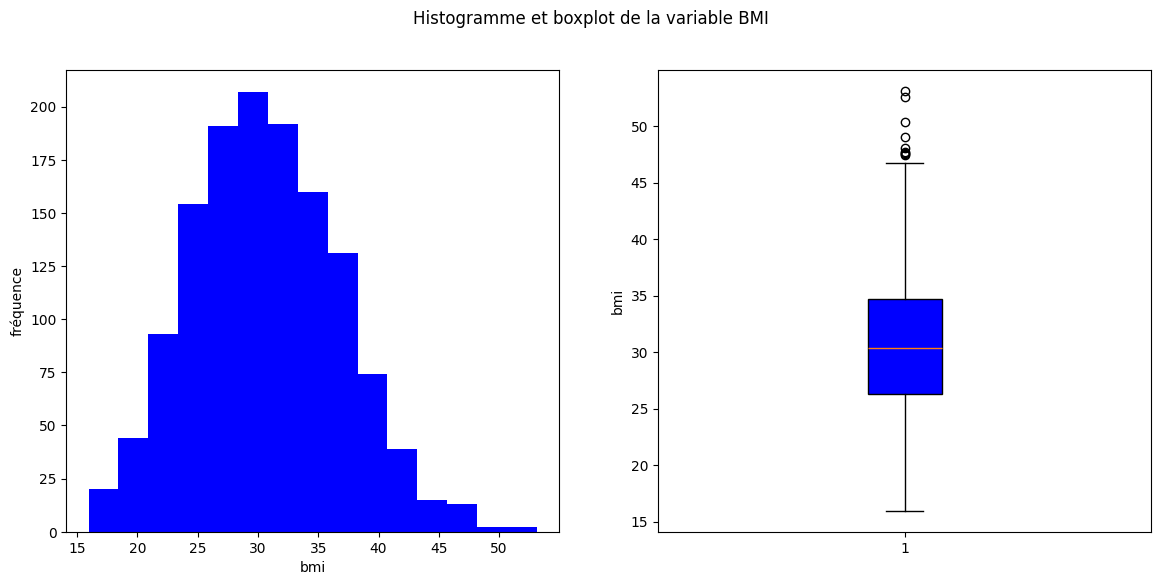

In [36]:
#Dispersion de la variable BMI
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

fig.suptitle('Histogramme et boxplot de la variable BMI')

ax1.hist(df['bmi'], color = 'blue', bins=15)
ax1.set_xlabel('bmi')
ax1.set_ylabel('fréquence')

ax2.boxplot(df['bmi'], patch_artist=True ,boxprops=dict(facecolor='blue'))
ax2.set_ylabel('bmi')

plt.show()

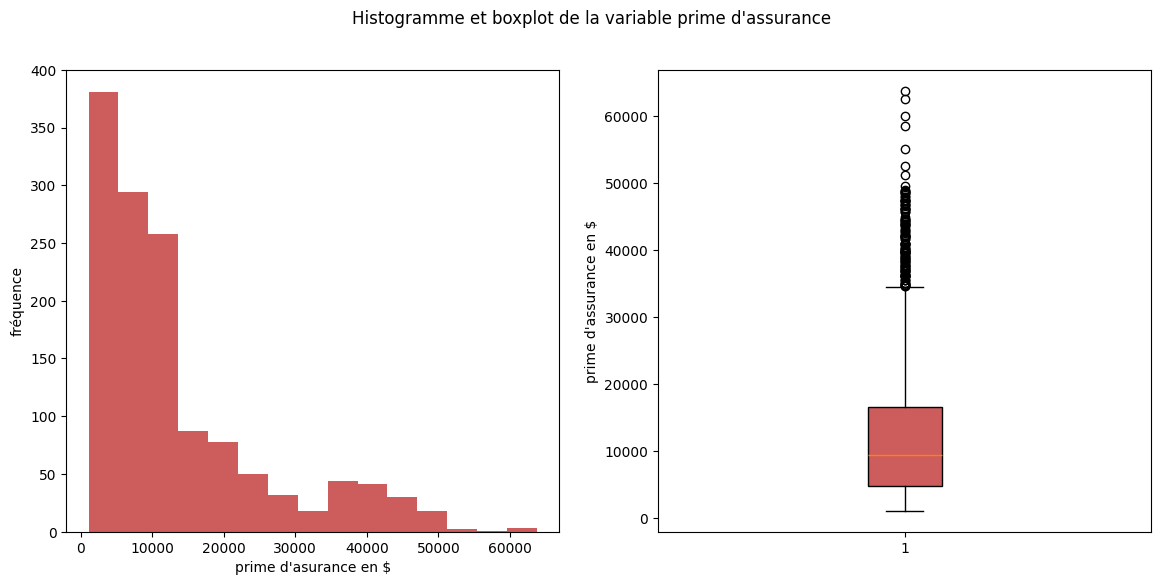

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

fig.suptitle("Histogramme et boxplot de la variable prime d'assurance")

ax1.hist(df['charges'], color = 'indianred', bins=15)
ax1.set_xlabel("prime d'asurance en $")
ax1.set_ylabel('fréquence')

ax2.boxplot(df['charges'], patch_artist=True ,boxprops=dict(facecolor='indianred'))
ax2.set_ylabel("prime d'assurance en $")

plt.show()

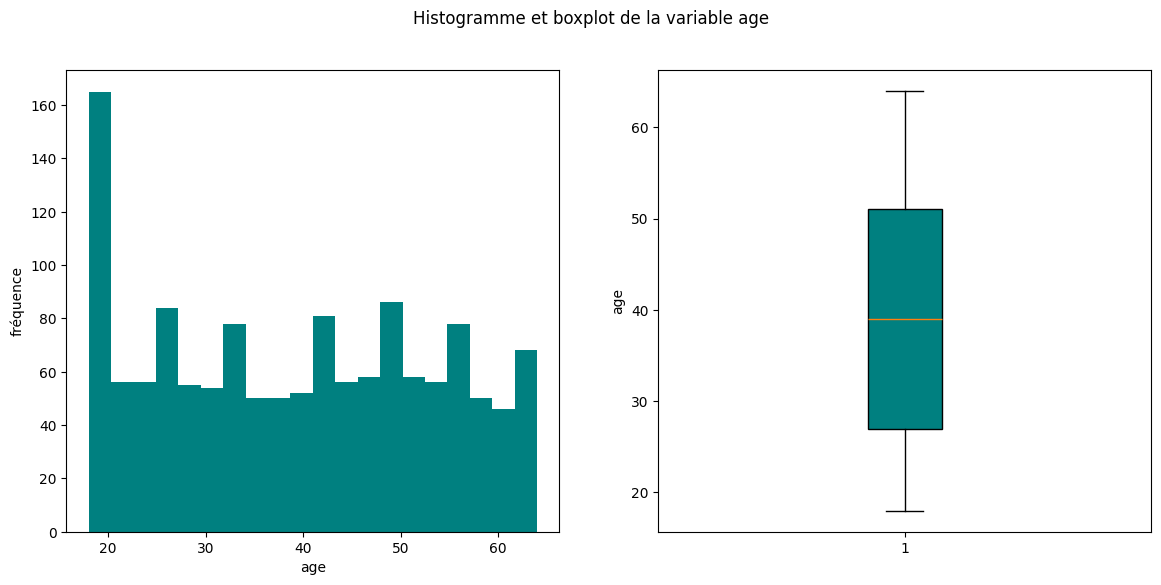

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

fig.suptitle("Histogramme et boxplot de la variable age")

ax1.hist(df['age'], color = 'teal', bins=20)
ax1.set_xlabel("age")
ax1.set_ylabel('fréquence')

ax2.boxplot(df['age'], patch_artist=True ,boxprops=dict(facecolor='teal'))
ax2.set_ylabel("age")

plt.show()

### Analyse bivariée

La premiere étape de l'analyse bivariée c'est à dire, l'analyse entre 2 variables, c'est de calculer la matrice de corrélation et de la visualiser à l'aide de la heatmap proposée dans la librairie seaborn. 

Pour ce faire, nous mettons de côté les variables catégorielles pour le moment car la matrice de correlation évalue uniquement le lien linéaire entre deux variables quantitatives.

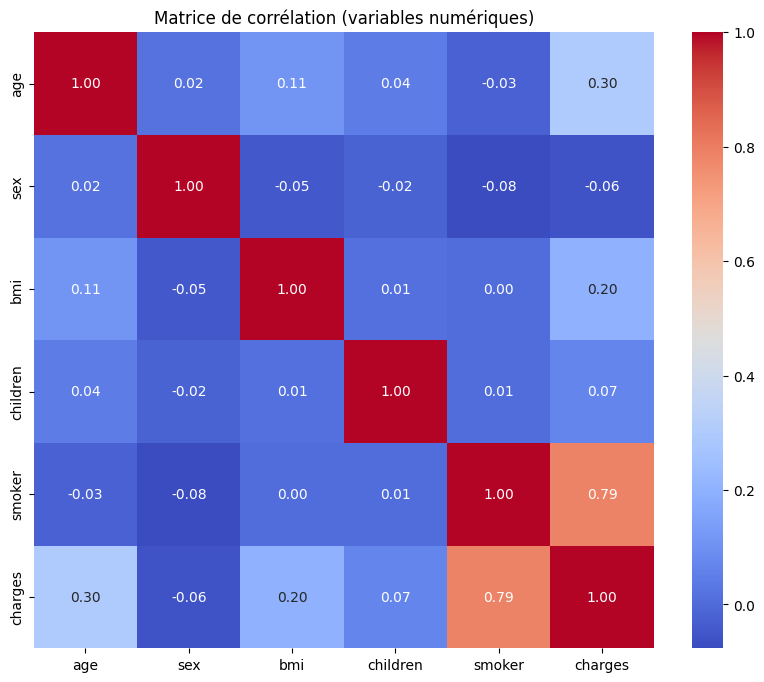

In [39]:

df_numerique = df.select_dtypes(include=['float64', 'int64'])

corr= df_numerique.corr() #creer la matrice de corrélation

plt.figure(figsize=(10, 8)) #creer la heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f') #fmt indique le presenter les correlations à 2 chiffres aprés la virgule
plt.title('Matrice de corrélation (variables numériques)')
plt.show()

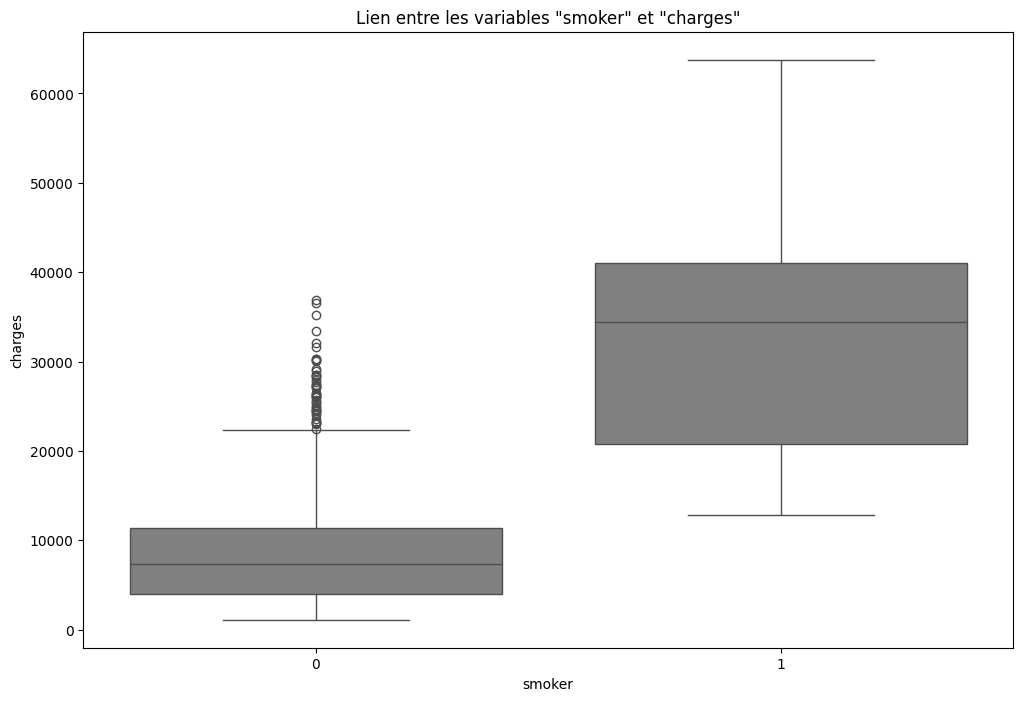

In [40]:
#la matrice montre un lien fort entre le fait de fumer et payer une prime lourde. Visualisons la relation avec des boxplots pour chaque catégoriue de la variable 'smoker'.

plt.figure(figsize=(12,8))
sns.boxplot(x='smoker', y='charges', data = df, color='grey')
plt.title('Lien entre les variables "smoker" et "charges"')

plt.show()


On peut déjà émettre des constats, pour les non-fumeurs:
    - la médiane est centrée à environ 8 000 $: la majorité des non fumeurs sont regroupés autour de cette valeur.
    - la boite compacte signifie une dispersion faible des charges dans cette population;
    - la moustache supérieure signale la présence de quelques outliers.

Pour les fumeurs:
    - la médiane est plus élevée (35 000$),
    - la boite est plus etiree, les valeurs des charges sont plus dispersees que chez les non-fumeurs

Pour approfondir l'analyse, on fait un test statistique pour évaluer la significativité des charges pour les fumeurs et non-fumeurs.

In [41]:
from scipy.stats import ttest_ind
#le but est d'étudier les moyennes des charges chez les groupes fumeur et non fumeur
group1 = df[df['smoker']==0]
group2 = df[df['smoker']==1]

ttest_ind(group1['charges'], group2['charges'])

TtestResult(statistic=-46.64479459840305, pvalue=1.4067220949376498e-282, df=1335.0)

On observe que t test statistique = -46,65 et p-value=1.41*10^-282
p-value < 0,05 donc on peut conclure que les differences entre les moyennes de charges entre les 2 groupes sont significatives

Etudions maintenant le lien entre lers variables age et charges. 

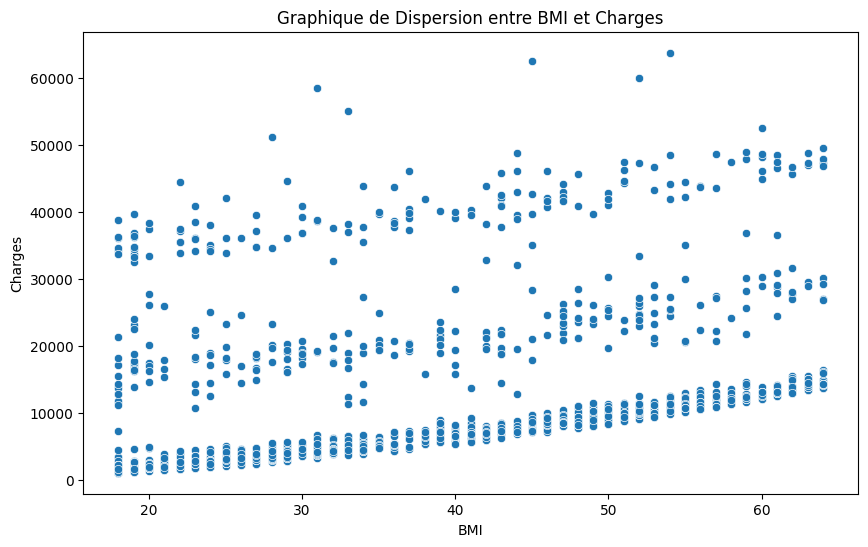

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Graphique de Dispersion entre BMI et Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

On obtient 3 nuages de points distinctifs qui representeraient chacun 3 courbes évoluant en parallèle. Il s'agirait des 3 groupes distincts et donc une autre variable catégorielle serait le facteur d'influence.

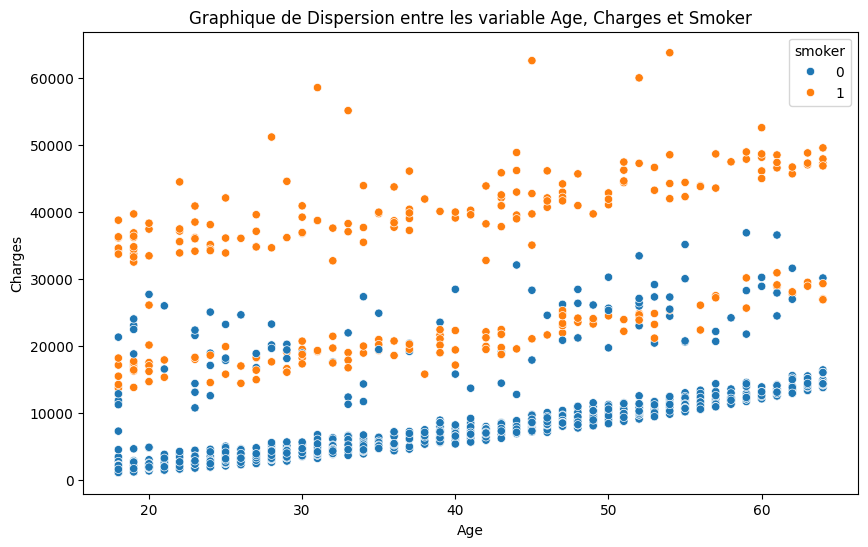

In [43]:
#on trace le nuage de points et on intégre une variable catégorielle dans le parametre hue
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Graphique de Dispersion entre les variable Age, Charges et Smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

<Figure size 1000x600 with 0 Axes>

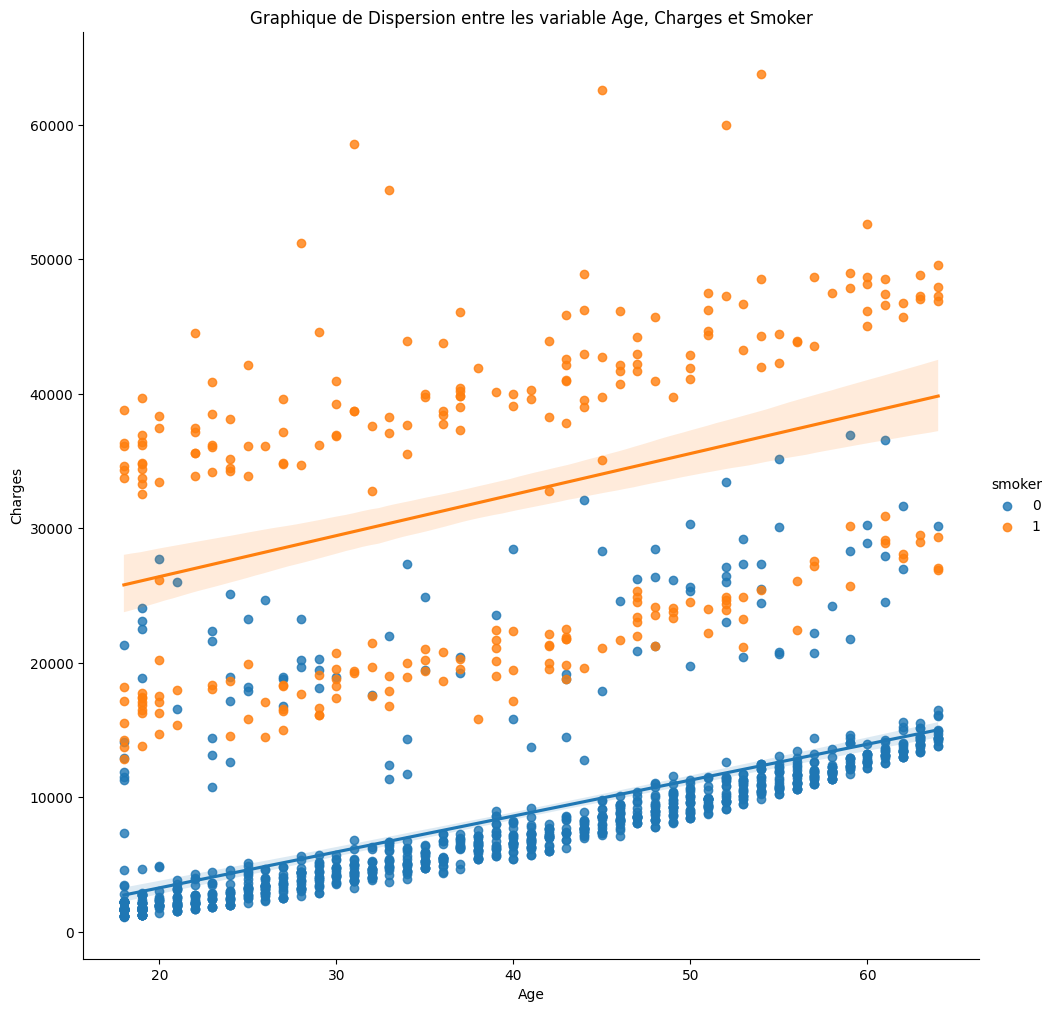

In [44]:
#ajouter droite de regression par groupe
plt.figure(figsize=(10, 6))

sns.lmplot(x='age', y='charges', hue='smoker', data=df, height=10)
plt.title('Graphique de Dispersion entre les variable Age, Charges et Smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

La séparation des nuages de points suggère que la relation entre age et charges peut être différente selon que la personne est fumeuse ou non.

Pour la suite, il faut tenir compte de ces points.


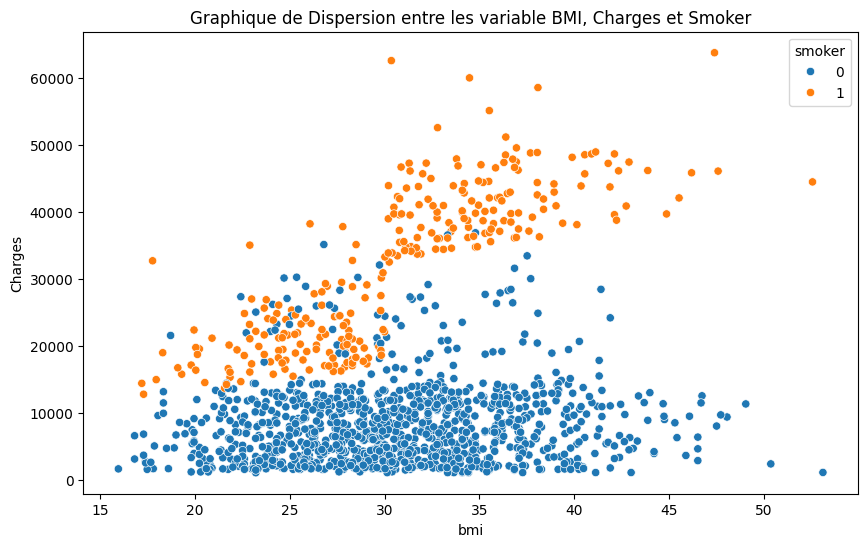

In [45]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Graphique de Dispersion entre les variable BMI, Charges et Smoker')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.show()

In [49]:
a, b, r,p,_ = stats.linregress(df.bmi, df.charges) #(axes x,y)
a,b,r,p

(393.8558912099734,
 1202.1403670662148,
 0.1984008312262494,
 2.4680404264512973e-13)

In [72]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


train, test = train_test_split(df, test_size=0.2)

X_train=train[['age', 'smoker']] #on prend uniquement les données d'interet
y_train = train['charges']

model = LinearRegression()
model.fit(X_train, y_train)
#model.score(X_train, y_train)

predictions = model.predict(X_train)

#plt.scatter(X,y, color = 'blue')
#plt.plot(X, predictions, color = 'pink')

# Faites des prédictions sur les données de test
X_test = test[['age', 'smoker']]
y_test = test['charges']
predictions_test = model.predict(X_test)

r2_test = r2_score(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)

r2 = r2_score(y_train, predictions)
mse_train = mean_squared_error(y_train, predictions)
rmse_train = np.sqrt(mse_train)

print(f"R^2 Score (Train): {r2_train}")
print(f"MSE (Train): {mse_train}")
print(f"RMSE (Train): {rmse_train}")



R^2 Score (Train): 0.7277631759339449
MSE (Train): 41193669.72559241
RMSE (Train): 6418.22948527025


In [64]:

train, test = train_test_split(df, test_size=0.2) #divise données en 80/20

X_train = train[['age', 'smoker', 'bmi']] #X_train est une matrice avec les données explicatives numériques
y_train = train['charges']

# Créez le modèle de régression linéaire
model = LinearRegression()

# Entraînez le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faites des prédictions sur les données d'entraînement
predictions_train = model.predict(X_train)

# Calculez le R^2 et l'erreur quadratique moyenne (MSE) sur les données d'entraînement
r2_train = r2_score(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)

print(f"R^2 Score (Train): {r2_train}")
print(f"MSE (Train): {mse_train}")
print(f"RMSE (Train): {rmse_train}")

# Faites des prédictions sur les données de test
X_test = test[['age', 'smoker']]
y_test = test['charges']
predictions_test = model.predict(X_test)

# Calculez le R^2 et l'erreur quadratique moyenne (MSE) sur les données de test
r2_test = r2_score(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)

print(f"R^2 Score (Test): {r2_test}")
print(f"MSE (Test): {mse_test}")
print(f"RMSE (Test): {rmse_test}")

plt.scatter(X_test['age'], y_test, label='charges observées')
plt.scatter(X_test['age'], predictions_test, c='r', label='charges prédites')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()


R^2 Score (Train): 0.7544653930794095
MSE (Train): 37411493.76110455
RMSE (Train): 6116.493583835803


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- bmi


In [76]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_category
0,19,1,27.900,0,1,southwest,16884.92400,Surpoids,18-25
1,18,0,33.770,1,0,southeast,1725.55230,Obésité modérée,18-25
2,28,0,33.000,3,0,southeast,4449.46200,Obésité modérée,26-30
3,33,0,22.705,0,0,northwest,21984.47061,Poids normal,31-40
4,32,0,28.880,0,0,northwest,3866.85520,Surpoids,31-40
...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,0,northwest,10600.54830,Obésité modérée,41-50
1333,18,1,31.920,0,0,northeast,2205.98080,Obésité modérée,18-25
1334,18,1,36.850,0,0,southeast,1629.83350,Obésité sévère,18-25
1335,21,1,25.800,0,0,southwest,2007.94500,Surpoids,18-25


In [77]:
train, test = train_test_split(df, test_size=0.2)

#X_train = train[['age', 'smoker']]
y_train = train['charges']

X_train = pd.get_dummies(train[['age', 'smoker', 'bmi']], columns=['bmi'], drop_first=True) #encode bmi


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

model = LinearRegression()

model.fit(X_train, y_train) #entraine le modele

predictions_train = model.predict(X_train) 


r2_train = r2_score(y_train, predictions_train) #calcul r2 et mse sur train
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)

print(f"R^2 Score (Train): {r2_train}")
print(f"MSE (Train): {mse_train}")
print(f"RMSE (Train): {rmse_train}")


KeyError: "None of [Index(['bmi'], dtype='object')] are in the [columns]"

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

model = ElasticNet (l1_ratio = 1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs=-1)

scores = abs(scores)

print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

NameError: name 'mean' is not defined

___
### Construction de modèles
___

Pour le traitement de nos données par les modéles de machine learning, on doit encoder les variables catégorielles. La variable 'region' n'est pas encodée, on utilisera l'encodage one hot.

L'encodage one-hot est une technique qui convertit chaque catégorie d'une variable catégorielle en une nouvelle colonne binaire et attribue une valeur de 1 à la colonne correspondante pour chaque échantillon. Chaque échantillon aura une seule colonne activée (1) et toutes les autres seront désactivées (0).

Elastic Net est un algorithme de machine learning puissant qui combine les regressions Lasso et Ridge.

In [57]:
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

df_encoded

,age,sex,bmi,children,smoker,charges,bmi_category,age_category,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,Surpoids,18-25,False,False,True
1,18,0,33.770,1,0,1725.55230,Obésité modérée,18-25,False,True,False
2,28,0,33.000,3,0,4449.46200,Obésité modérée,26-30,False,True,False
3,33,0,22.705,0,0,21984.47061,Poids normal,31-40,True,False,False
4,32,0,28.880,0,0,3866.85520,Surpoids,31-40,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,0,10600.54830,Obésité modérée,41-50,True,False,False
1333,18,1,31.920,0,0,2205.98080,Obésité modérée,18-25,False,False,False
1334,18,1,36.850,0,0,1629.83350,Obésité sévère,18-25,False,True,False
1335,21,1,25.800,0,0,2007.94500,Surpoids,18-25,False,False,True


La normalisation permet de réduire l'étendue des données en les centrant. On normalise nos données en créant un nouveau dataframe.

In [ ]:
df_normalized = df.copy()

for column in df_normalized:
    